# Import

In [43]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

# Ingestion

In [2]:
facebook_raw = pd.read_csv(r'F:\For work\Data set\dataset_facebook-comments-scraper_2024-06-11_04-11-23-243 (1).csv')
print(facebook_raw.shape)

(785, 22)


<Axes: >

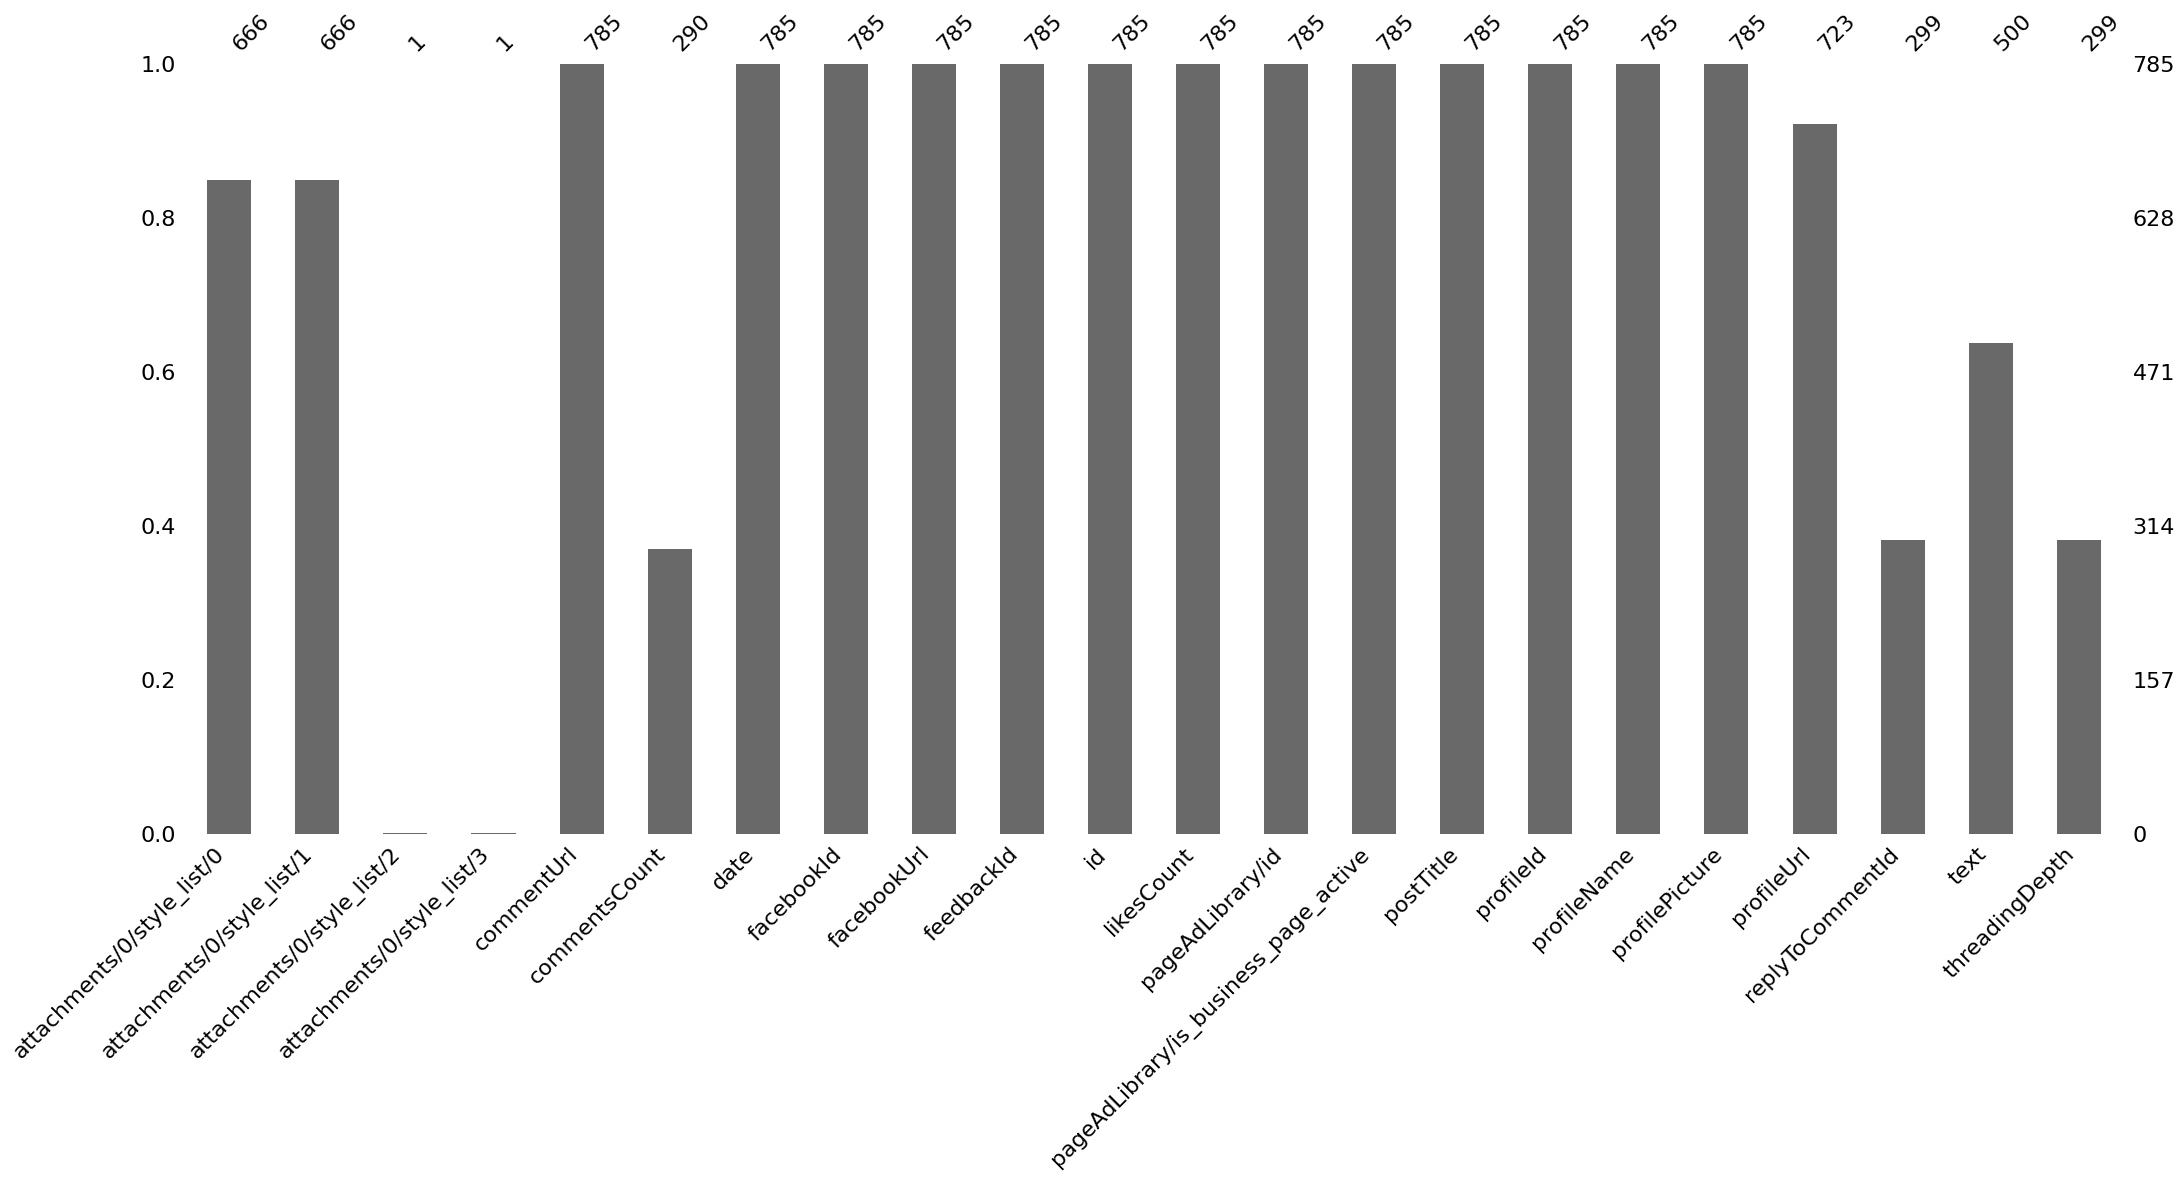

In [3]:
msno.bar(facebook_raw)

# EDA

## We can't see the distribution of date so we have to convert date to datetime object to visualize the 'date' distribution, this are still in EDA process

In [5]:
from datetime import datetime

def convert_date_and_time(column):
    # Convert date column to datetime
    facebook_raw[column] = pd.to_datetime(facebook_raw[column], format='%Y-%m-%dT%H:%M:%S.%fZ')
    
    # Extract date part and create a new column with dates only
    facebook_raw['date_only'] = facebook_raw[column].dt.date
    
    # Extract time part and create a new column with time only
    facebook_raw['timestamp'] = facebook_raw[column].dt.strftime('%H:%M:%S')
    
    return facebook_raw

In [6]:
facebook_raw = convert_date_and_time('date')

In [7]:
facebook_raw['date_only'].value_counts()

date_only
2024-06-10    185
2024-06-09    153
2024-06-02    127
2024-06-01     59
2024-06-08     53
2024-06-07     49
2024-06-03     37
2024-06-05     33
2024-06-06     26
2024-05-31     25
2024-06-04     24
2024-05-29      8
2024-05-30      6
Name: count, dtype: int64

In [8]:
facebook_raw['timestamp'].value_counts()

timestamp
14:35:13    2
13:02:02    2
09:12:55    1
21:44:32    1
15:40:01    1
           ..
07:25:08    1
10:51:40    1
08:09:21    1
08:00:50    1
21:35:26    1
Name: count, Length: 783, dtype: int64

In [9]:
# Drop the original date column
facebook_raw = facebook_raw.drop('date', axis=1)

facebook_raw.rename(columns={'date_only': 'date'}, inplace=True)

In [10]:
facebook_raw.head()

,attachments/0/style_list/0,attachments/0/style_list/1,attachments/0/style_list/2,attachments/0/style_list/3,commentUrl,commentsCount,facebookId,facebookUrl,feedbackId,id,likesCount,pageAdLibrary/id,pageAdLibrary/is_business_page_active,postTitle,profileId,profileName,profilePicture,profileUrl,replyToCommentId,text,threadingDepth,date,timestamp
0,photo,fallback,NaN,NaN,https://www.facebook.com/TOJONews/posts/pfbid0...,1.0,869328301881125,https://www.facebook.com/TOJONews/posts/pfbid0...,ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzQzNDg4NzIwNj...,Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfNDM0ODg3MjA2MD...,14,100663921489162,False,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,100064118881354,TOJO News,https://scontent.fdac31-1.fna.fbcdn.net/v/t39....,https://www.facebook.com/TOJONews,NaN,แอดมินใจดีใบ้เพิ่มให้ทุกคนนะคะ 🤭 มีใครทายถูกไห...,NaN,2024-06-05,09:12:55
1,video_inline,video,games_app,fallback,https://www.facebook.com/TOJONews/posts/pfbid0...,NaN,869328301881125,https://www.facebook.com/TOJONews/posts/pfbid0...,ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzMwMjI2NDQ4Mj...,Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfMzAyMjY0NDgyOT...,7,100663921489162,False,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,100064118881354,TOJO News,https://scontent.fdac31-1.fna.fbcdn.net/v/t39....,https://www.facebook.com/TOJONews,NaN,นับถอยหลัง 4 วัน แอดมินมีคำใบ้เพิ่มมาให้ทุกคนก...,NaN,2024-06-06,08:54:17
2,photo,fallback,NaN,NaN,https://www.facebook.com/TOJONews/posts/pfbid0...,1.0,869328301881125,https://www.facebook.com/TOJONews/posts/pfbid0...,ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzExNTEzNjM5MT...,Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfMTE1MTM2MzkxNj...,0,100663921489162,False,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,100000252273736,Daeng Kku,https://scontent.fdac31-1.fna.fbcdn.net/v/t39....,https://www.facebook.com/daeng.kku,NaN,ร่วมกิจกรรม\nโจอี้ ภูวศิษฐ์​ อนันต์พรสิริ\nDa...,NaN,2024-06-10,09:05:00
3,NaN,NaN,NaN,NaN,https://www.facebook.com/TOJONews/posts/pfbid0...,1.0,869328301881125,https://www.facebook.com/TOJONews/posts/pfbid0...,ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzIxODU0OTMyMD...,Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfMjE4NTQ5MzIwMT...,1,100663921489162,False,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,1220677411,Nu Earn Jieamjindarat,https://scontent.fdac31-2.fna.fbcdn.net/v/t39....,https://www.facebook.com/nuearn.jang,NaN,นุ๊ก ธนดล\nจันทร์เพ็ญ เพ็ญ Aou Kub Monvipa U-...,NaN,2024-05-30,09:30:41
4,NaN,NaN,NaN,NaN,https://www.facebook.com/TOJONews/posts/pfbid0...,NaN,869328301881125,https://www.facebook.com/TOJONews/posts/pfbid0...,ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1Xzk5NjE2MTM5NT...,Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfOTk2MTYxMzk1ND...,0,100663921489162,False,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,100000700855252,ดนุพงษ์ กลิ่นษร,https://scontent.fdac31-1.fna.fbcdn.net/v/t39....,https://www.facebook.com/aofjung2in1,NaN,อาร์ เดอะสตาร์ค่ะ (อาณัตพล ศิริชุมแสง) Amarit...,NaN,2024-05-30,13:36:49


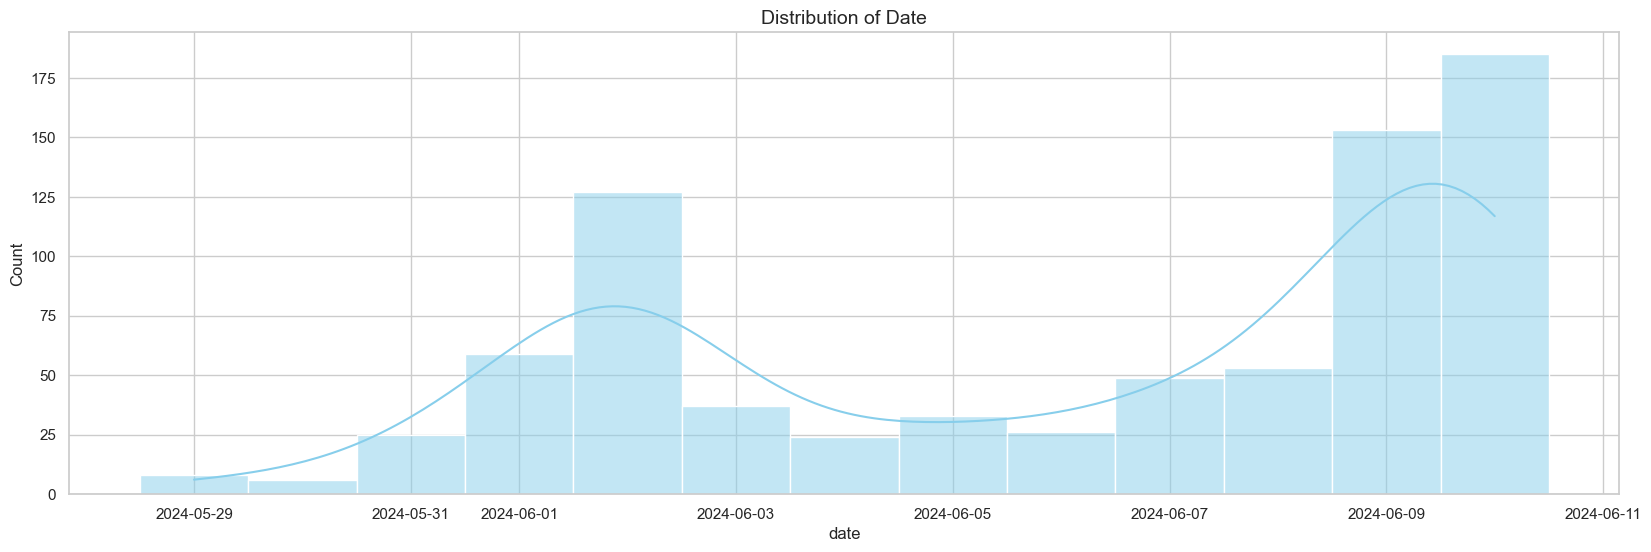

In [12]:
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(1, 1, figsize = (20, 6))

sns.histplot(facebook_raw['date'], kde = True, color = 'skyblue', ax = ax)

#Set the title for each plot
ax.set_title('Distribution of Date', fontsize = 14)

plt.show()

In [19]:
facebook_raw['profileName'].value_counts()

profileName
Veerawat Tangsrad           5
สมศักดิ์ สินนิธิส           4
Ditthakron Nest             3
MiewOoz Jieranan            3
พิศิษฐ อินทรสังขนาวิน       3
                           ..
พูลศิริ สลักคำ              1
มาร์ค ผู้ค่ายักษ์           1
แตงหวาน ฟางแก้ว             1
Pim Nilrat                  1
นู๋ว์ ตุ้ยนุ้ย ปภาวรินท์    1
Name: count, Length: 485, dtype: int64

In [20]:
facebook_raw['profileName'].nunique()

485

# Oberservation


1. Source of the data are from the TOJO NEWS share campaign 
2. Data are range between 2024-05-29 - 2024-06-10 == 12 days 
3. There are total of 7xx comments
4. There are 485 Unique ProfileName
4. We will do only text analysis, will skip the part of image, attachment analysis


# Data Preprocessing

## Extract username

In [25]:
facebook_raw.columns

Index(['attachments/0/style_list/0', 'attachments/0/style_list/1',
       'attachments/0/style_list/2', 'attachments/0/style_list/3',
       'commentUrl', 'commentsCount', 'facebookId', 'facebookUrl',
       'feedbackId', 'id', 'likesCount', 'pageAdLibrary/id',
       'pageAdLibrary/is_business_page_active', 'postTitle', 'profileId',
       'profileName', 'profilePicture', 'profileUrl', 'replyToCommentId',
       'text', 'threadingDepth', 'date', 'timestamp'],
      dtype='object')

In [42]:
facebook_raw.profileUrl.value_counts()

profileUrl
https://www.facebook.com/people/Veerawat-Tangsrad/pfbid028qgiXsY1TjwmwVAboHS27A4PCYXyKxXyxzVYMXsyGrhRKjC27Yh5aubN7gGArcUvl/                                                                                                                                                                                           5
https://www.facebook.com/people/%E0%B8%AA%E0%B8%A1%E0%B8%A8%E0%B8%B1%E0%B8%81%E0%B8%94%E0%B8%B4%E0%B9%8C-%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%99%E0%B8%B4%E0%B8%98%E0%B8%B4%E0%B8%AA/pfbid0286YiKpR2kuQwdtTnTttW2oCErKQ7b65i3GRNmpDh9AmnKfaDzRCtx9AqdcNuuxyJl/                                                           4
https://www.facebook.com/kungza.hh                                                                                                                                                                                                                                                                                    3
https://www.facebook.com/aofjung2in1                 

In [37]:
#Extract username from profileUrl
facebook_raw['username'] = facebook_raw['profileUrl'].str.split('/').str[-1]

In [38]:
facebook_raw['username'].value_counts()

username
                           505
aofjung2in1                  3
ditthakron.nest.9            3
kantacha.kraisawad           3
kru.kla.5                    3
                          ... 
tonpaibook                   1
khnm.ru.67940                1
giftsawitreechaipaitoon      1
koy.tualek                   1
mam.mahaudom                 1
Name: count, Length: 142, dtype: int64

In [44]:
#Replace 'None' with NaN
facebook_raw['username'] = facebook_raw['username'].replace('None', np.nan)

In [46]:
facebook_raw.columns

Index(['attachments/0/style_list/0', 'attachments/0/style_list/1',
       'attachments/0/style_list/2', 'attachments/0/style_list/3',
       'commentUrl', 'commentsCount', 'facebookId', 'facebookUrl',
       'feedbackId', 'id', 'likesCount', 'pageAdLibrary/id',
       'pageAdLibrary/is_business_page_active', 'postTitle', 'profileId',
       'profileName', 'profilePicture', 'profileUrl', 'replyToCommentId',
       'text', 'threadingDepth', 'date', 'timestamp', 'username'],
      dtype='object')

In [50]:
facebook_raw.profileId.value_counts()

profileId
pfbid028qgiXsY1TjwmwVAboHS27A4PCYXyKxXyxzVYMXsyGrhRKjC27Yh5aubN7gGArcUvl    5
pfbid0286YiKpR2kuQwdtTnTttW2oCErKQ7b65i3GRNmpDh9AmnKfaDzRCtx9AqdcNuuxyJl    4
pfbid0U9RBu3jRU66zvzmNGgqf9xVLU29qnAoN9HeJCucLTXw2xTtbcbbaThTBy9KASgUNl     3
pfbid0yPT5RF8HD3Xvm71PuK2yqF4YDwGNQHtDCE5LqxpRk4QeJkRg2s4XFpGbDq9hqY5Ml     3
pfbid0uRzx9SRnhiSosXef1iKcm7L4DMLjrMdzHqovNPyNZ3ALKssuVuNsYgzHd24BQUrDl     3
                                                                           ..
pfbid0nfVtM3un98LZFshZkNeksbGWaRa7eMchWvMWLkkzWQytNyF4PhoZ2F8pxRKovTGEl     1
pfbid0FTLkMqBLRCRZ8xDA8sT5xZkiTrfHXTjrqEGER7fugspvKcr57b8YhCfT3g389dHzl     1
pfbid0BQ6uoHUni2djDoVNnvbDd5QM1yW9yqybSyYwkk6u51b5mui3inL7bqnhKdtMJrnVl     1
pfbid02WujiPLnQtArWpUxhSsaqXHJUyhJjMUFpLZye2GYV5Eb4Uqm7M6o8QMycE8XaBCyol    1
pfbid02DC52CEjAvUZEhp7vJEPsntJ4Wv1UNpZr7aH2xu1BVmTNWJsoSrP1Q3UY1BFnPXFdl    1
Name: count, Length: 485, dtype: int64

In [51]:
#Filtered facebook_raw to include only column we need for text analysis

#Lowercase all columns name
facebook_raw.columns = facebook_raw.columns.str.lower()

facebook = facebook_raw[['profileid', 'profilename', 'username', 'profileurl', 'text', 'posttitle', 'date', 'timestamp']]

In [52]:
facebook

,profileid,profilename,username,profileurl,text,posttitle,date,timestamp
0,100064118881354,TOJO News,TOJONews,https://www.facebook.com/TOJONews,แอดมินใจดีใบ้เพิ่มให้ทุกคนนะคะ 🤭 มีใครทายถูกไห...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-05,09:12:55
1,100064118881354,TOJO News,TOJONews,https://www.facebook.com/TOJONews,นับถอยหลัง 4 วัน แอดมินมีคำใบ้เพิ่มมาให้ทุกคนก...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-06,08:54:17
2,100000252273736,Daeng Kku,daeng.kku,https://www.facebook.com/daeng.kku,ร่วมกิจกรรม\nโจอี้ ภูวศิษฐ์​ อนันต์พรสิริ\nDa...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-10,09:05:00
3,1220677411,Nu Earn Jieamjindarat,nuearn.jang,https://www.facebook.com/nuearn.jang,นุ๊ก ธนดล\nจันทร์เพ็ญ เพ็ญ Aou Kub Monvipa U-...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-05-30,09:30:41
4,100000700855252,ดนุพงษ์ กลิ่นษร,aofjung2in1,https://www.facebook.com/aofjung2in1,อาร์ เดอะสตาร์ค่ะ (อาณัตพล ศิริชุมแสง) Amarit...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-05-30,13:36:49
...,...,...,...,...,...,...,...,...
780,100095146487102,มีเป้าหมาย รอดตายให้ผ่านวัน,,https://www.facebook.com/people/%E0%B8%A1%E0%B...,NaN,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-09,22:19:40
781,pfbid02LCDrqxb1XqVcqVpvxzmDAdYx1MEG6r8n8dFtzm6...,รุ่งรัสรา ประชาธนานุกิจ,NaN,NaN,NaN,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-02,12:29:46
782,pfbid0JsEKSJQ4TrWtGoGNiXgv4vsL4Lj5YPZKBTzZ1pvN...,Sazzy Kae,kaeya.chu,https://www.facebook.com/kaeya.chu,NaN,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-07,02:11:52
783,pfbid0RvmWxJeur7sMpW1P7f8dMawQgTm9hMpG2jyP8yzG...,ชาเนย ชญานุช,,https://www.facebook.com/people/%E0%B8%8A%E0%B...,NaN,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-09,22:13:49


In [56]:
#Exclude rows with missing text
facebook = facebook[facebook['text'].notna()]
facebook.shape

(500, 8)

In [60]:
#Exclude admin messages
facebook = facebook[facebook['username'] != 'TOJONews']

In [61]:
facebook

,profileid,profilename,username,profileurl,text,posttitle,date,timestamp
2,100000252273736,Daeng Kku,daeng.kku,https://www.facebook.com/daeng.kku,ร่วมกิจกรรม\nโจอี้ ภูวศิษฐ์​ อนันต์พรสิริ\nDa...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-10,09:05:00
3,1220677411,Nu Earn Jieamjindarat,nuearn.jang,https://www.facebook.com/nuearn.jang,นุ๊ก ธนดล\nจันทร์เพ็ญ เพ็ญ Aou Kub Monvipa U-...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-05-30,09:30:41
4,100000700855252,ดนุพงษ์ กลิ่นษร,aofjung2in1,https://www.facebook.com/aofjung2in1,อาร์ เดอะสตาร์ค่ะ (อาณัตพล ศิริชุมแสง) Amarit...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-05-30,13:36:49
5,pfbid0cRiwUP4ESAwiMJZTpjf61qEe4qU9FkuiSwwX4s7k...,Sasiwimon Puachaisri,bowi.sasiwimom,https://www.facebook.com/bowi.sasiwimom,❤️ร่วมกิจกรรมค่ะ❤️\nตอบ : ยุทธนา เปื้องกลาง หร...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-10,10:00:30
6,pfbid0286YiKpR2kuQwdtTnTttW2oCErKQ7b65i3GRNmpD...,สมศักดิ์ สินนิธิส,,https://www.facebook.com/people/%E0%B8%AA%E0%B...,"""โจอี้ ภูวศิษฐ์ อนันต์พรสิริ"" เดาล่ะ \nBoonrat...",📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-05-30,13:17:07
...,...,...,...,...,...,...,...,...
745,pfbid035QGS4aVNq3ZakCrKX3t9Aq6yAFdgFiiCKnbsgDu...,Wannaporn Lee,novey.varitt,https://www.facebook.com/novey.varitt,ตอบ เขตต์ ศิรสิทธิ์ พันยา\nYuu Pariss \nDittha...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-02,04:09:50
746,pfbid0Ron8TLMLS26LtRHk6Qt5N59nMp84V54A9sXDj8xr...,Puy Nittaya Ja,puynittaya.kanavan,https://www.facebook.com/puynittaya.kanavan,นู๋ว์ ตุ้ยนุ้ย ปภาวรินท์,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-05-31,22:31:42
747,pfbid02JM62K9C6oPQBkn1wNnJgCGb9Ujcizr2iDEHTYVp...,Ai Riin,NaN,NaN,ตอบว่า เขตต์ ศิรสิทธิ์ พันยา\nบุ๋ม บุ๋ม\nภัทร...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-09,14:54:13
748,pfbid0BdeNhehwfaLyuL55s4pKWJmLMjFK8woAL3iDo5jr...,Twinbee Blacklabel,suwantoonbodyslamtg88888888888,https://www.facebook.com/suwantoonbodyslamtg88...,โจอี้ ภูวศิษฐ์ อนันต์พรสิริ\nมร โศภา รัตนากูล ...,📣 ทายเงาลุ้นเงิน ✨ กิจกรรมที่เปิดโอกาสให้สายสุ...,2024-06-06,23:55:46
